In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl

<div dir="rtl"> 

# תרגיל 1:

<div dir="rtl">  במפעל צעצועים משתמשים במכונות פלסטיקה בטמפרטורות גבוהות. פעולה לא נכונה של הפועל במפעל הוא יקבל כוויה. ישנם 3 סוגים של מכונות A, B ו- C. ידוע כי מה שמשפיע על תאונת עבודה של פועל זה המיומנות שלו. המיומנות היא תוצאה של ניסיון ויכולת אישית. לכל עובד יש רמת מיומנות המיוחסת לו על ידי המנהלים שלו. להלן טבלה שכל שורה מסמלת מספר תאונות שהיו לעובד במשך ה-100 המשמרות הראשונות שלו בכל מכונה. 

In [16]:
num_workers = 50
skills = np.random.uniform(0,100,num_workers)
skills_ = np.tile(skills,3)
customer_id = np.tile(np.arange(1,51),3)
size = customer_id.shape[0]

In [52]:
As = np.tile(np.array(['A']), num_workers)
Bs = np.tile(np.array(['B']), num_workers)
Cs = np.tile(np.array(['C']), num_workers)

machines = np.append(As,Bs)
machines = np.append(machines,Cs)
machines

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype='<U1')

In [59]:
machine_vals = np.array([])
for ind in range(size):
    machine_vals = np.append(machine_vals, factory_dict[machines[ind]])
machine_vals

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.,  12.,  12.,  12.,  12.,  12.,  12.])

In [60]:
factory_dict = {'A': 0, 'B': -10, 'C':12}
# factory_names = {0: 'A', 1: 'B', 2: 'C'}

b0 = 32
b1 = -0.2
y_vals_accidents = b0 + b1*skills_ +   np.random.normal(0,2,skills_.shape[0]) + machine_vals
y_vals_accidents = y_vals_accidents.astype(int) 
y_vals_accidents.min()

0

In [43]:
customer_id = np.tile(np.arange(1,51),3)
size = customer_id.shape[0]

df_data = pd.DataFrame([])
df_data['intercept'] = np.ones(size)
df_data['employ_id'] = customer_id
df_data['skill'] = skills_
df_data['machines'] = machines


df_data['accidents'] = y_vals_accidents


df_data.head()

NameError: name 'skills_' is not defined

In [39]:
pkl.dump(df_data, open('../pkl/excersize_1_1_data.pkl', 'wb'))

In [44]:
df_data = pkl.load( open('../pkl/excersize_1_1_data.pkl', 'rb'))

In [45]:
df_data.head()

,intercept,employ_id,skill,machines,accidents
0,1.0,1,95.828940,A,13
1,1.0,2,75.077053,A,17
2,1.0,3,24.102591,A,26
3,1.0,4,11.216351,A,30
4,1.0,5,77.530490,A,20


<div dir="rtl">  להלן יש לנו dataframe עם העמודות:
     <br/>
    intercept - עמודה של 1ים עבור החותך
    <br/>
    customer_id - מס זיהוי של העובד
     <br/>
    skill - בערכה של מיומנות העובד
    <br/>    
    machines - סוג המכונה
     <br/>    
    accidents - מס' תאונות של העובד במכונה מסימות ב-100 שעות
עמודה של 1ים עבור החותך


<div dir="rtl"> סעיף
1. נא לפלוט גרף שמראה את כל מספר התאונות כפונקצייה של הskill של העובד. 

<div dir="rtl"> סעיף
2. נא להוציא משוואה ליניארית המתארת את הקשר בין הskill למספר התאונות. יש לרשום את המשוואה. 
    בנוסף להוציא גרף של הנתונים יחד עם משוואת הרגרסיה. לאחר מכן יש להוציא גרף של הנתונים יחד עם המשוואה שהתקבלה.

<div dir="rtl"> סעיף 
3. מהו ה$R^2$? מהו pvalue של הskill ו החותך? האם שניהם נכנסים למודל? 

<div dir="rtl"> סעיף
4. להוציא גרף כמו מקודם שמתאר את מספר התאונות כפונקצייה של הskill, רק הפעם שכל מכונה תהיה צבועה בצבע אחר.

<div dir="rtl"> סעיף
5.  להוציא משוואת רגרסיה כאשר סוג המכונה גם נכנס למודל. האם יש שינוי ב$R^2$, מה ההבדל בין המכונות השונות? באיזו מכונה יש הכי הרבה תאונות? האם זה בהלימה עם הגרף מהסעיף הקודם? 

<div dir="rtl"> סעיף
6. מה המשמעות של הפרטמרים של משתני הדמה במודל? 

<div dir="rtl"> סעיף
7. נא לבדוק את הנחות המודל 

<div dir="rtl">  פתרון 1:

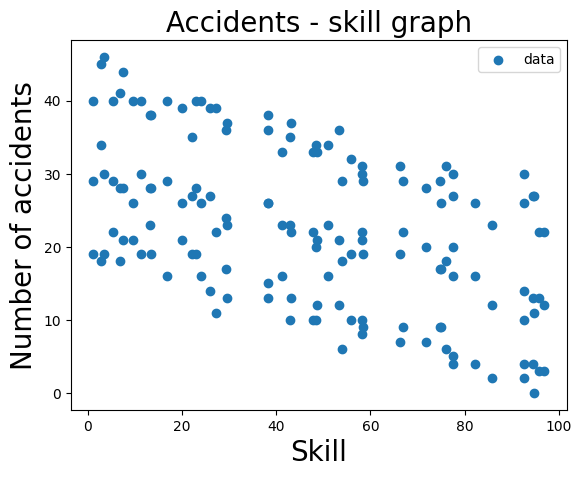

In [9]:
plt.figure()
plt.xlabel('Skill', fontsize= 20)
plt.ylabel('Number of accidents', fontsize= 20)
plt.scatter(df_data['skill'], df_data['accidents'], label = 'data')
plt.title('Accidents - skill graph', fontsize= 20)
plt.legend()
plt.show()

<div dir="rtl">
    פתרון 2 


In [10]:
# Create a linear regression model
model = sm.OLS(df_data['accidents'], df_data.loc[:, ['intercept', 'skill']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     55.62
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           6.86e-12
Time:                        08:28:43   Log-Likelihood:                -545.56
No. Observations:                 150   AIC:                             1095.
Df Residuals:                     148   BIC:                             1101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.5443      1.423     22.161      0.0

<div dir="rtl">
המשוואת רגרסיה היא:  
    $accidents = 31.54 - 0.1913*skills$

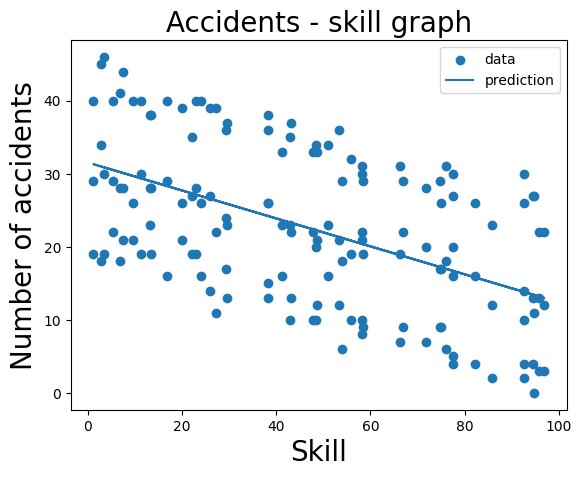

In [13]:
plt.figure()
plt.xlabel('Skill', fontsize= 20)
plt.ylabel('Number of accidents', fontsize= 20)
plt.scatter(df_data['skill'], df_data['accidents'], label = 'data')
df_data['preds'] = results.predict(df_data.loc[:, ['intercept', 'skill']])
plt.plot(df_data['skill'], df_data['preds'], label = 'prediction')
plt.title('Accidents - skill graph', fontsize= 20)
plt.legend()
plt.show()

<div dir="rtl"> פתרון  3:  הpvalue של שני המשתנים הוא 0.000, כלומר הם נכנסים למודל. אבל ה$R^2=0.273$  לא  גבוה 

<div dir="rtl"> פתרון 4: 

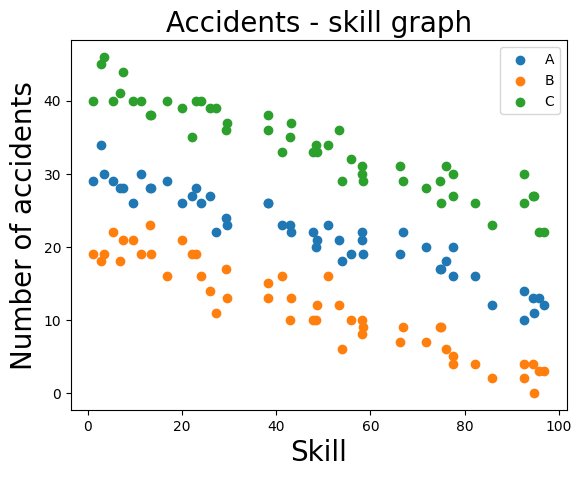

In [14]:
plt.figure()
for machine in ['A', 'B', 'C']:
    plt.scatter(df_data.loc[df_data['machines']==machine,'skill'], df_data.loc[df_data['machines']==machine,'accidents'], label = machine)
plt.xlabel('Skill', fontsize= 20)
plt.ylabel('Number of accidents', fontsize= 20)
plt.legend()
plt.title('Accidents - skill graph', fontsize= 20)
plt.show()

<div dir="rtl"> לפי הגרף ניתן לראות שיש הבדל ניכר בין המוכנות, כאשר מכונה C יש הכי הרבה תאונות.

<div dir="rtl">  כעת נעשה מודל חדש יחד עם משתני הדמה:   

 $$ accidents = b_o + b_1*skills + d_1*machine_B+ d_2*machine_C $$

In [15]:
dummy_variables = pd.get_dummies(df_data['machines'])

# Concatenate dummy variables with the original DataFrame and drop the original column
df_data = pd.concat([df_data, dummy_variables], axis=1)
df_data.head()

,intercept,employ_id,skill,machines,accidents,preds,A,B,C
0,1.0,1,95.828940,A,13,13.209109,1,0,0
1,1.0,2,75.077053,A,17,17.179612,1,0,0
2,1.0,3,24.102591,A,26,26.932664,1,0,0
3,1.0,4,11.216351,A,30,29.398216,1,0,0
4,1.0,5,77.530490,A,20,16.710190,1,0,0


In [16]:
# Create a linear regression model
model1 = sm.OLS(df_data['accidents'], df_data.loc[:, ['intercept', 'skill', 'B', 'C']])
# Fit the model
results1 = model1.fit()
# Print summary statistics, including p-values for each coefficient
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1395.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          3.22e-107
Time:                        08:28:55   Log-Likelihood:                -315.25
No. Observations:                 150   AIC:                             638.5
Df Residuals:                     146   BIC:                             650.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.9576      0.386     80.218      0.0

The final model: 

$$ accidents =30.95 + -0.19*skills + -10.1*machine_B+ +11.86*machine_C $$

<div dir="rtl">  פתרון 5

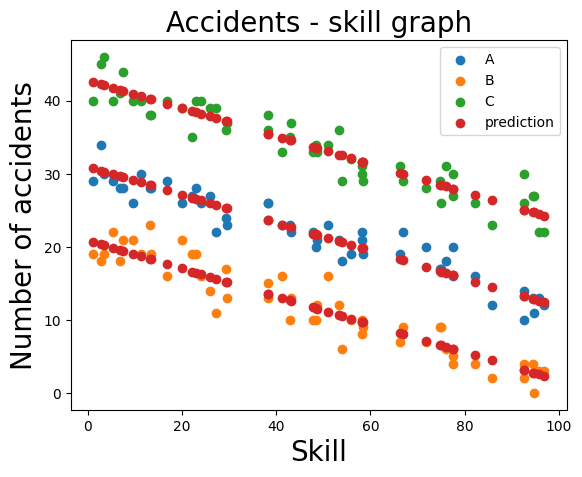

In [19]:
plt.figure()

for machine in ['A', 'B', 'C']:
    plt.scatter(df_data.loc[df_data['machines']==machine,'skill'], df_data.loc[df_data['machines']==machine,'accidents'], label = machine)

df_data['preds_with_dummy'] = results1.predict(df_data.loc[:, ['intercept', 'skill', 'B', 'C']])
plt.scatter(df_data['skill'], df_data['preds_with_dummy'], label = 'prediction')    
    
plt.xlabel('Skill', fontsize= 20)
plt.ylabel('Number of accidents', fontsize= 20)
plt.legend()
plt.title('Accidents - skill graph', fontsize= 20)
plt.show()



<div dir="rtl"> כמובן ניתן לראות שכל המשתנים נכנסים למודל וש$R^2=0.966$, מה שמראה שסוג המכונה מאד חשוב בשביל תחזית מספר תאונות.

<div dir="rtl"> פתרון 6: 
    
    הפרמטר של המשתנה מכונה B שווה ל-10.1- ושל הפרמטר מכונה C  שווה ל11.86. כלומר ב-B  יש 10.1 פחות תאונות בממוצע ואילו ב-C יש 11.86 יותר ביחס למכונה A.

<div dir="rtl"> פתרון 7:  נבדוק הנחות המודל. ליניאריות: ננסה לראות דרך פונקציית השגיאות 

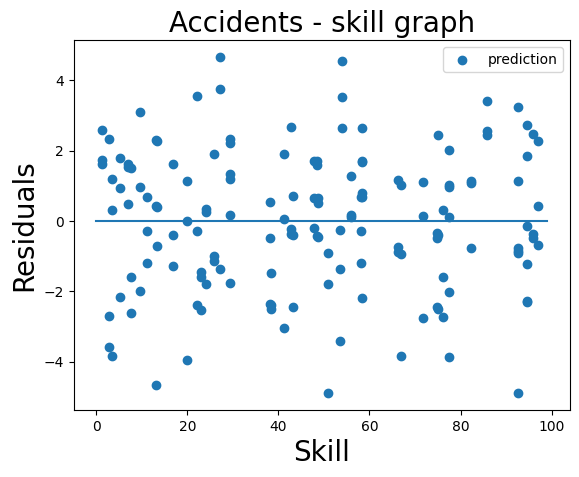

In [20]:
plt.figure()
df_data['preds_with_dummy_residuals'] = results1.predict(df_data.loc[:, ['intercept', 'skill', 'B', 'C']])-df_data.loc[:,'accidents']
plt.scatter(df_data['skill'], df_data['preds_with_dummy_residuals'], label = 'prediction')    
    
plt.xlabel('Skill', fontsize= 20)
plt.ylabel('Residuals', fontsize= 20)
plt.plot(np.arange(100), np.zeros(100))
plt.legend()
plt.title('Accidents - skill graph', fontsize= 20)
plt.show()

<div dir="rtl"> ניתן לראות כי השגיאות מפוזרות בצורה אקראית לחלוטין. דבר זה מעיד על ליניאריות. אין איזשהו טרנד מסוים. 

<div dir="rtl"> כעת נבדוק שיוויון שונויות. גם כאן ניתן לראות לפי גרף שגיאות שאין מגמה בשגיאה כפונקציה של הskill. לכן ההנחה מתקיימת. 

<div dir="rtl"> עכשיו נעשה הסטרוגרמה של השגיאות על מנת לבדוק שהשגיאות מתפלגות נורמלי.  

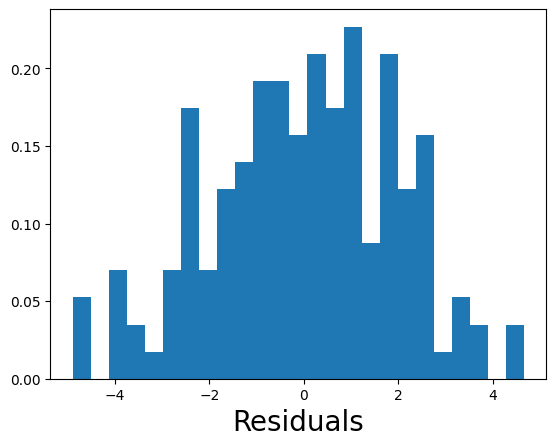

In [21]:
plt.figure()
plt.hist(df_data['preds_with_dummy_residuals'], bins = 25, density = True)
plt.xlabel('Residuals', fontsize = 20)
plt.show()

<div dir="rtl"> מההסטורגמה עולה שהשגיאות מתפלגות נורמלי

<div dir="rtl"> 
    
# תרגיל 2:

<div dir="rtl">    ישנם 9 כובבי לכת (כולל פלוטו). ישנה השערה שיש קשר בין הערך המספרי, כלומר גימטריה,  בין הקוטר של כוכב הלכת. בתרגיל הבא נרצה לבדוק השערה זו.
   לפי המקורות לכל  כוכב לכת יש שם עברי קדום (לרוב נמצא בספר אויב).
    להלן dataframe בשם df_gimatria ויש בו מספר עמודות:
    <br/>
    stars - שמות כוכבי הלכת בלועזית
    <br/>
    stars_hebrew - שמות כוכבי הלכת בעברית
     <br/>
    Gimatria_English - ערך בגימטריה לפי שמות בלועזית
    <br/>    
    Gimatria - ערך בגימטריה לפי השמות בעברית
     <br/>    
    Diameter - קוטר כוכבי הלכת
     <br/>    
    Intercept - עמודה של 1ים עבור החותך


<div dir="rtl"> סעיף 1.  נא להוציא גרף המקשר בין הערך בגימטריה של השם בעברית והערך והקוטר.

<div dir="rtl"> סעיף 2. נא למצוא מודל ליניארי המקשר בין הערך המספרי של גימטריה לבין הקוטר. האם הפלט מצביע על קשר בעל מובהקות סטטיטית? מהו $R^2$? האם הוא מצביע על התאמה גבוה של המודל לנתונים?

<div dir="rtl">  סעיף 3. נא לנסות לעשות טרנספורמציה של אורך הקוטר (נא לעשות Ln), האם הטרנספורמציה  מגדילה את $R^2$?

<div dir="rtl">  סעיף 4. נא לחזור על סעיפים 2 -3 עבור הערך גימטריה באנגלית. האם הגעתם לאותה מסקנה? 

In [22]:
df_gimatria = pkl.load( open('../pkl/df_gimatria.pkl', 'rb'))
df_gimatria.head()

,star_names,stars_Hebrew,Gimatria,Gimatria_English,Diameter,Log_Diameter,Intercept
0,pluto,Kochav,48,131,2302,7.741534,1.0
1,Mercury,Kimah,75,556,4879,8.492696,1.0
2,Mars,Ksil,120,95,6794,8.823795,1.0
3,Venus,Mazar,247,58,12104,9.401291,1.0
4,Earth,Eretz,291,291,12756,9.453757,1.0


<div dir="rtl"> 
    
# פתרון 2: 

In [123]:
# stars = ['pluto', 'Mercury', 'Mars', 'Venus', 'Earth', 'Neptune', 'Uranus', 'Saturn', 'Jupiter']
# stars_Hebrew = ['Kochav', 'Kimah','Ksil', 'Mazar', 'Eretz','Ash','Aish','Teman', 'Shachar']
# Gimatria_English = [131, 556, 95, 58, 291, 195, 323, 713, 194]
# Gimatria = [48, 75, 120, 247,291, 370, 380, 490, 508]
# Diameter = [2302, 4879, 6794, 12104, 12756, 49528, 51118, 120536, 142984]
# mass_density = [2,5.43,3.94,5.24,5.51,1.76,1.3,0.7,1.33]
# size = len(Diameter)
# df_gimatria = pd.DataFrame([])
# df_gimatria['star_names'] = stars
# df_gimatria['stars_Hebrew'] = stars_Hebrew
# df_gimatria['Gimatria'] = Gimatria
# df_gimatria['Gimatria_English'] = Gimatria_English
# df_gimatria['Diameter'] = Diameter
# df_gimatria['Log_Diameter'] =  np.log(np.array(Diameter))
# df_gimatria['Intercept'] = np.ones(size)
# df_gimatria.head()

,star_names,stars_Hebrew,Gimatria,Gimatria_English,Diameter,Log_Diameter,Intercept
0,pluto,Kochav,48,131,2302,7.741534,1.0
1,Mercury,Kimah,75,556,4879,8.492696,1.0
2,Mars,Ksil,120,95,6794,8.823795,1.0
3,Venus,Mazar,247,58,12104,9.401291,1.0
4,Earth,Eretz,291,291,12756,9.453757,1.0


In [127]:
# pkl.dump(df_gimatria, open('../pkl/df_gimatria.pkl', 'wb'))

<div dir="rtl"> סעיף 1.  תחילה נראה כיצד הנתנונים נראים. מהגרף למטה נראה שיש קשר מונוטוני בין הגימטריה לבין הקוטר אך לא ליניארי.  

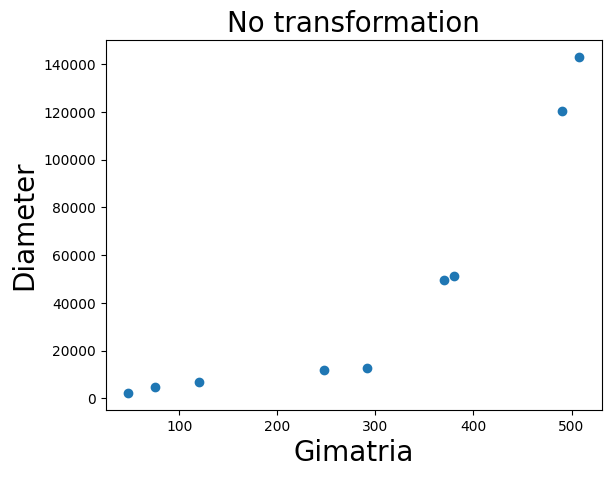

In [23]:
plt.figure()
plt.scatter(df_gimatria['Gimatria'], df_gimatria['Diameter'])
plt.xlabel('Gimatria')
plt.ylabel('Diameter')
plt.xlabel('Gimatria', fontsize = 20)
plt.ylabel('Diameter', fontsize = 20)
plt.title('No transformation', fontsize = 20)
plt.show()

<div dir="rtl"> סעיף 2. נעשה מודל לינארי. ניתן לראות שהחותך לא מובהק (כי הpvalue גדול מ0.05) אבל הערך הגימטרי כן מובהק מה שמצביע שישנו קשר בין השניים. ה$R^2 = 0.778$ מה שמצביע על התאמת המודל לנתונים סבירה. 

In [24]:
# Create a linear regression model
model2 = sm.OLS(df_gimatria['Diameter'], df_gimatria.loc[:, ['Intercept', 'Gimatria']])
# Fit the model
results2 = model2.fit()
# Print summary statistics, including p-values for each coefficient
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               Diameter   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     24.48
Date:                Thu, 19 Oct 2023   Prob (F-statistic):            0.00166
Time:                        08:33:29   Log-Likelihood:                -103.36
No. Observations:                   9   AIC:                             210.7
Df Residuals:                       7   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.139e+04   1.78e+04     -1.766      0.1

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


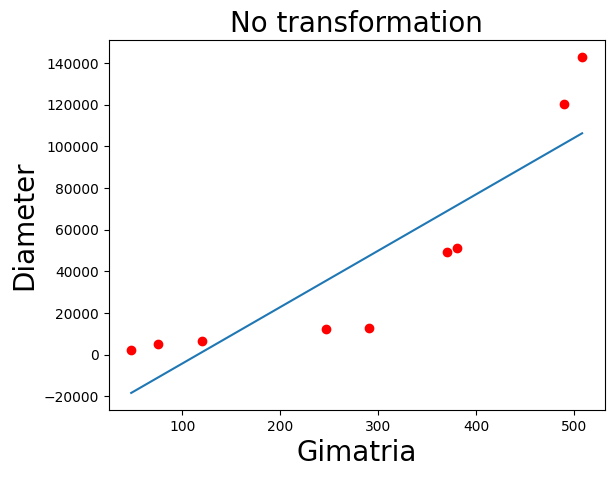

In [25]:
df_gimatria['preds'] = results2.predict(df_gimatria.loc[:, ['Intercept', 'Gimatria']])
plt.figure()
plt.plot(df_gimatria['Gimatria'], df_gimatria['preds'])
plt.scatter(df_gimatria['Gimatria'], df_gimatria['Diameter'],color = 'red')
plt.xlabel('Gimatria', fontsize = 20)
plt.ylabel('Diameter', fontsize = 20)
plt.title('No transformation', fontsize = 20)
plt.show()

<div dir="rtl">  סעיף 3:

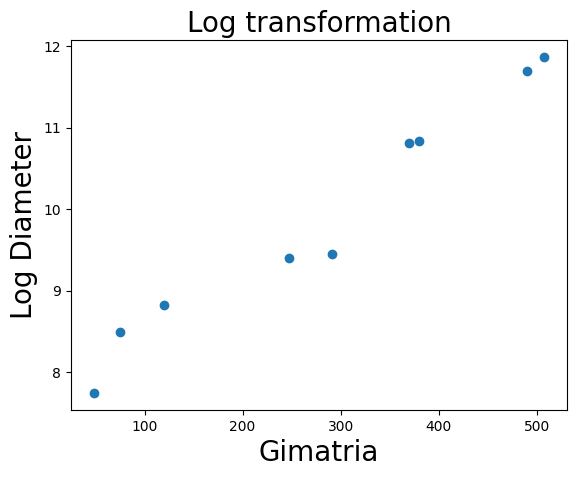

In [26]:
plt.figure()
plt.scatter(df_gimatria['Gimatria'], df_gimatria['Log_Diameter'])
plt.xlabel('Gimatria')
plt.ylabel('Log_Diameter')
plt.xlabel('Gimatria', fontsize = 20)
plt.ylabel('Log Diameter', fontsize = 20)
plt.title('Log transformation', fontsize = 20)
plt.show()

<div dir="rtl"> סעיף 3. כאן ניתן לראות את הקשר הליניארי בין גמיטריה של כוכב הלכת וlog הקוטר.
    ה-$R^2=0.965$ קפיצה משמעותית בערך. ניתן לראות מהגרף למטה שהמודל מותאם הרבה יותר טוב לנתונים. במקרה זה הפרמטרים של שני המשתנים יצאו מובהקים. 

In [27]:
# Create a linear regression model
model3 = sm.OLS(df_gimatria['Log_Diameter'], df_gimatria.loc[:, ['Intercept', 'Gimatria']])
# Fit the model
results3 = model3.fit()
# Print summary statistics, including p-values for each coefficient
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_Diameter   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     195.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           2.28e-06
Time:                        08:33:34   Log-Likelihood:               -0.52020
No. Observations:                   9   AIC:                             5.040
Df Residuals:                       7   BIC:                             5.435
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5591      0.194     39.002      0.0

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
df_gimatria['preds_log'] = results3.predict(df_gimatria.loc[:, ['Intercept', 'Gimatria']])

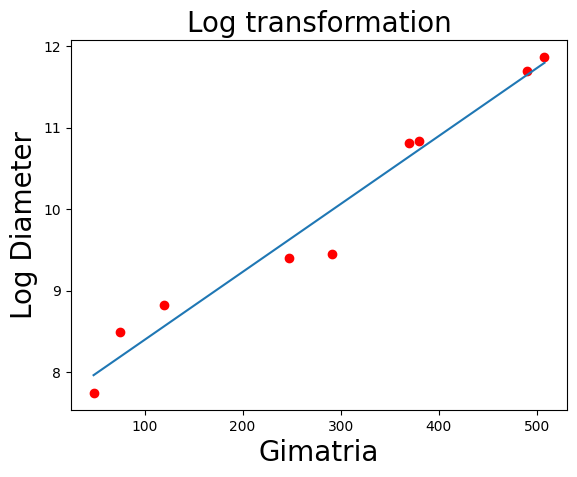

In [30]:
plt.figure()
plt.plot(df_gimatria['Gimatria'], df_gimatria['preds_log'])
plt.scatter(df_gimatria['Gimatria'], df_gimatria['Log_Diameter'],color = 'red')
plt.xlabel('Gimatria', fontsize = 20)
plt.ylabel('Log Diameter', fontsize = 20)
plt.title('Log transformation', fontsize = 20)
plt.show()

<div dir="rtl"> סעיף 4. 
נעשה את אותו ניתוח עבור הערך הגימטרי באנגלית. מהניתוח למטה נראה שגם במקרה של ללא טרנספורמציה של נתוני הקוטר וגם עם Log transformation הפרמטר של הערך בגימטריה לא מובהק. 


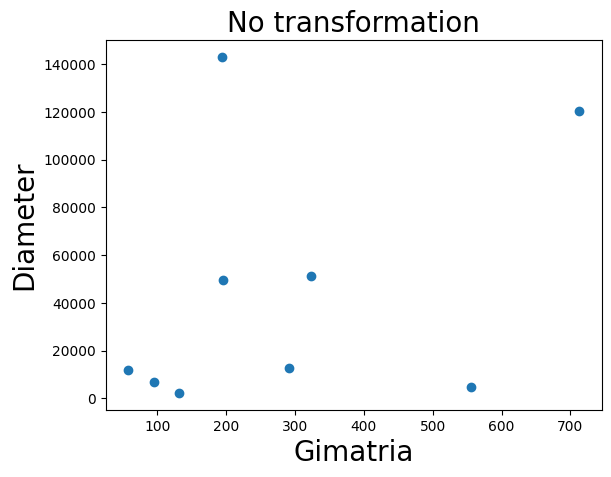

In [31]:
plt.figure()
plt.scatter(df_gimatria['Gimatria_English'], df_gimatria['Diameter'])
plt.xlabel('Gimatria')
plt.ylabel('Diameter')
plt.xlabel('Gimatria', fontsize = 20)
plt.ylabel('Diameter', fontsize = 20)
plt.title('No transformation', fontsize = 20)
plt.show()

In [32]:
# Create a linear regression model
model4 = sm.OLS(df_gimatria['Diameter'], df_gimatria.loc[:, ['Intercept', 'Gimatria_English']])
# Fit the model
results4 = model4.fit()
# Print summary statistics, including p-values for each coefficient
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:               Diameter   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.044
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.341
Time:                        08:33:43   Log-Likelihood:                -109.50
No. Observations:                   9   AIC:                             223.0
Df Residuals:                       7   BIC:                             223.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.014e+04   2.98e+04  

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


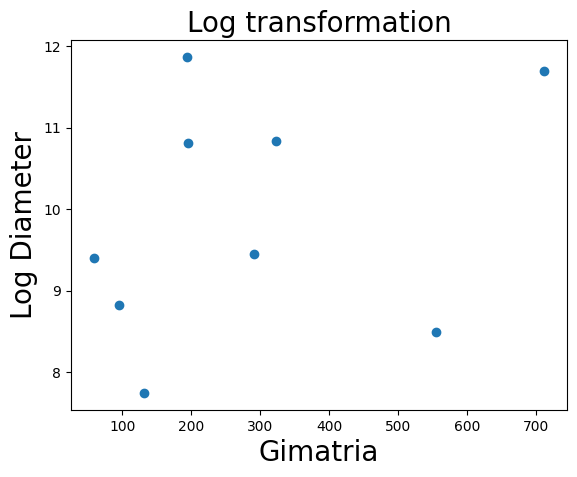

In [33]:
plt.figure()
plt.scatter(df_gimatria['Gimatria_English'], df_gimatria['Log_Diameter'])
plt.xlabel('Gimatria', fontsize = 20)
plt.ylabel('Log Diameter', fontsize = 20)
plt.title('Log transformation', fontsize = 20)
plt.show()

In [34]:
# Create a linear regression model
model5 = sm.OLS(df_gimatria['Log_Diameter'], df_gimatria.loc[:, ['Intercept', 'Gimatria_English']])
# Fit the model
results5 = model5.fit()
# Print summary statistics, including p-values for each coefficient
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_Diameter   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.7757
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.408
Time:                        08:33:47   Log-Likelihood:                -15.181
No. Observations:                   9   AIC:                             34.36
Df Residuals:                       7   BIC:                             34.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.3070      0.839  

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<div dir="rtl">
    
# תרגיל 3

<div dir="rtl">  להלן נתונים של גובה עלות דירה בדולרים בעיירה בארה"ב כפונקציה של מספר משתנים.
    המשתנים מופיעים בdataframe בשם data_3. להלן העמודות: 
        <br/>
    Intercept - עמודים של 1ים עבור החותך
    <br/>
    num_bedroom - מספר חדרי שינה
     <br/>
    num_bathrooms - מספר חדרי שירותים
    <br/>    
    Distance_from_City_Center - מרחק בק"מ ממרכז העיר
     <br/>    
    Distance_from_entrance - מרחק בק"מ מכניסת העיר

<div dir="rtl"> יש פה מודל רגרסיה רב משתנית. נרצה לבדוק אילו משתנים משפעים ואילו לא. ולבנות מודל רגרסיה שיכול לחזות עלות של דירה. 

<div dir="rtl"> סעיף 1. לבצע מודל רגרסיה עם כל המשתנים. אילו פרמטרים נכנסנו ואילו לא.  

<div dir="rtl"> סעיף 2. אם יש פרמטרים שלא נכנסנו, יש להוציא אותם ולהכניס רק פרמטרים שכן במודל. .  

<div dir="rtl"> סעיף 3. מהו ה$R^2$ של המודל הסופי? הוא הוא מצביע על קשר ליניארי אדוק בין המשתנים המסבירים והמוסברים.

In [153]:
size = 200
data_3 = pd.DataFrame([])
data_3['Intercept'] = np.ones(size)
data_3['num_bedroom'] = np.random.randint(1,5,size)
data_3['num_bathrooms'] = np.random.randint(1,3,size)
data_3['Distance_from_City_Center'] = np.random.uniform(1,50,size)
data_3['Distance_from_entrance'] = np.random.uniform(1,50,size)

b0, b1, b2, b3 = 120000, 2000, 500, 350 
data_3['selling_price'] = b0 + b1*data_3['num_bedroom'] + b2*data_3['num_bathrooms'] - b3*data_3['Distance_from_City_Center'] + np.random.normal(0, 1000, size)

In [159]:
pkl.dump(data_3, open('../pkl/data_3.pkl', 'wb'))

In [35]:
data_3 = pkl.load(open('../pkl/data_3.pkl', 'rb'))

In [36]:
data_3.head()

,Intercept,num_bedroom,num_bathrooms,Distance_from_City_Center,Distance_from_entrance,selling_price
0,1.0,1,2,4.231253,48.124870,120376.657491
1,1.0,2,1,36.672631,36.444092,111553.693836
2,1.0,1,2,32.553089,12.698870,111936.835704
3,1.0,3,2,14.182271,42.967992,122544.008611
4,1.0,3,2,28.468734,5.577941,116969.138373


In [37]:
# Create a linear regression model
model6 = sm.OLS(data_3['selling_price'], data_3.loc[:, ['Intercept', 'num_bedroom', 'num_bathrooms', 'Distance_from_City_Center', 'Distance_from_entrance']])
# Fit the model
results6 = model6.fit()
# Print summary statistics, including p-values for each coefficient
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1549.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.63e-146
Time:                        08:33:52   Log-Likelihood:                -1659.4
No. Observations:                 200   AIC:                             3329.
Df Residuals:                     195   BIC:                             3345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<div dir="rtl"> ניתן לראות כי המשתנה מרחק מכניסת העיר היחידי שלא מובקהק. נריץ מודל בלעדיו.

In [38]:
# Create a linear regression model
model7 = sm.OLS(data_3['selling_price'], data_3.loc[:, ['Intercept', 'num_bedroom', 'num_bathrooms', 'Distance_from_City_Center']])
# Fit the model
results7 = model7.fit()
# Print summary statistics, including p-values for each coefficient
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          4.34e-148
Time:                        08:33:54   Log-Likelihood:                -1659.7
No. Observations:                 200   AIC:                             3327.
Df Residuals:                     196   BIC:                             3341.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<div dir="rtl">  המודל הנוכחי הוא: 
    


$$selling price  = 1.202e+05  + 2019.8421 * num bedroom + 366.3962 * num bathrooms -350.5983 * Distance from City Center $$

<div dir="rtl">  $R^2=0.969$ כלומר התאמה גבוהה של המודל לנתונים. ניתן לראות כי כעת כל הנתונים מובהקים.